## Observations and Insights 

In [140]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [141]:
# Checking the number of mice.
combined_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [142]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [143]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(
  subset = ['Mouse ID', 'Timepoint'],
  keep = 'first').reset_index(drop = True)

clean_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [144]:
# Checking the number of mice in the clean DataFrame.
clean_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [145]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


table_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

table_mean


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [146]:
#Median
table_med = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
table_med

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [147]:
#SEM
table_SEM = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
table_SEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [148]:
#Variance
table_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
table_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [149]:
#Standard Deviation
table_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
table_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [150]:
#Summary Table
stats_merge1 = pd.merge(table_mean, table_med,on="Drug Regimen")
stats_merge1.columns = ['Mean', 'Median']



stats_merge1


,Mean,Median
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.393463,50.909965
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [151]:
stats_merge2 = pd.merge(stats_merge1, table_SEM,on="Drug Regimen")
stats_merge2.columns = ['Mean', 'Median', 'SEM']



stats_merge2

,Mean,Median,SEM
Drug Regimen,,,
Capomulin,40.675741,41.557809,0.329346
Ceftamin,52.591172,51.776157,0.469821
Infubinol,52.884795,51.820584,0.492236
Ketapril,55.235638,53.698743,0.603860
Naftisol,54.331565,52.509285,0.596466
Placebo,54.033581,52.288934,0.581331
Propriva,52.393463,50.909965,0.525862
Ramicane,40.216745,40.673236,0.320955
Stelasyn,54.233149,52.431737,0.573111


In [152]:
stats_merge3 = pd.merge(stats_merge2, table_var,on="Drug Regimen")
stats_merge3.columns = ['Mean', 'Median', 'SEM', "Variance"]



stats_merge3

,Mean,Median,SEM,Variance
Drug Regimen,,,,
Capomulin,40.675741,41.557809,0.329346,24.947764
Ceftamin,52.591172,51.776157,0.469821,39.290177
Infubinol,52.884795,51.820584,0.492236,43.128684
Ketapril,55.235638,53.698743,0.603860,68.553577
Naftisol,54.331565,52.509285,0.596466,66.173479
Placebo,54.033581,52.288934,0.581331,61.168083
Propriva,52.393463,50.909965,0.525862,43.138803
Ramicane,40.216745,40.673236,0.320955,23.486704
Stelasyn,54.233149,52.431737,0.573111,59.450562


In [153]:
#Final Summary Table

stats_mergefinal = pd.merge(stats_merge3, table_std,on="Drug Regimen")
stats_mergefinal.columns = ['Mean', 'Median', 'SEM', "Variance", "Standard Deviation"]



stats_mergefinal

,Mean,Median,SEM,Variance,Standard Deviation
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,0.329346,24.947764,4.994774
Ceftamin,52.591172,51.776157,0.469821,39.290177,6.268188
Infubinol,52.884795,51.820584,0.492236,43.128684,6.567243
Ketapril,55.235638,53.698743,0.603860,68.553577,8.279709
Naftisol,54.331565,52.509285,0.596466,66.173479,8.134708
Placebo,54.033581,52.288934,0.581331,61.168083,7.821003
Propriva,52.393463,50.909965,0.525862,43.138803,6.568014
Ramicane,40.216745,40.673236,0.320955,23.486704,4.846308
Stelasyn,54.233149,52.431737,0.573111,59.450562,7.710419


In [154]:
# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'sem', 'var', 'std'])

,mean,median,sem,var,std
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,0.329346,24.947764,4.994774
Ceftamin,52.591172,51.776157,0.469821,39.290177,6.268188
Infubinol,52.884795,51.820584,0.492236,43.128684,6.567243
Ketapril,55.235638,53.698743,0.603860,68.553577,8.279709
Naftisol,54.331565,52.509285,0.596466,66.173479,8.134708
Placebo,54.033581,52.288934,0.581331,61.168083,7.821003
Propriva,52.393463,50.909965,0.525862,43.138803,6.568014
Ramicane,40.216745,40.673236,0.320955,23.486704,4.846308
Stelasyn,54.233149,52.431737,0.573111,59.450562,7.710419


## Bar and Pie Charts

In [155]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

#Get unique mice

mice_drug1 = clean_df.groupby('Drug Regimen').count().reset_index()
mice_drug = mice_drug1[['Drug Regimen', 'Mouse ID']]
mice_drug = mice_drug.set_index('Drug Regimen')

mice_drug

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


In [156]:

mice_drug.plot(kind="bar", color='b', figsize=(7,3))
plt.title("Mice per Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()
plt.tight_layout()


<IPython.core.display.Javascript object>

In [157]:

# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice_drug2 = clean_df.groupby('Drug Regimen').count().reset_index()
mice_drug_2 = mice_drug2[['Drug Regimen', 'Mouse ID']]
mice_drug_2 = mice_drug_2.set_index('Drug Regimen')

mice_drug_2



,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


In [172]:
x_axis = np.arange(len(mice_drug))
tick_locations = [value for value in x_axis]
x_axis



array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


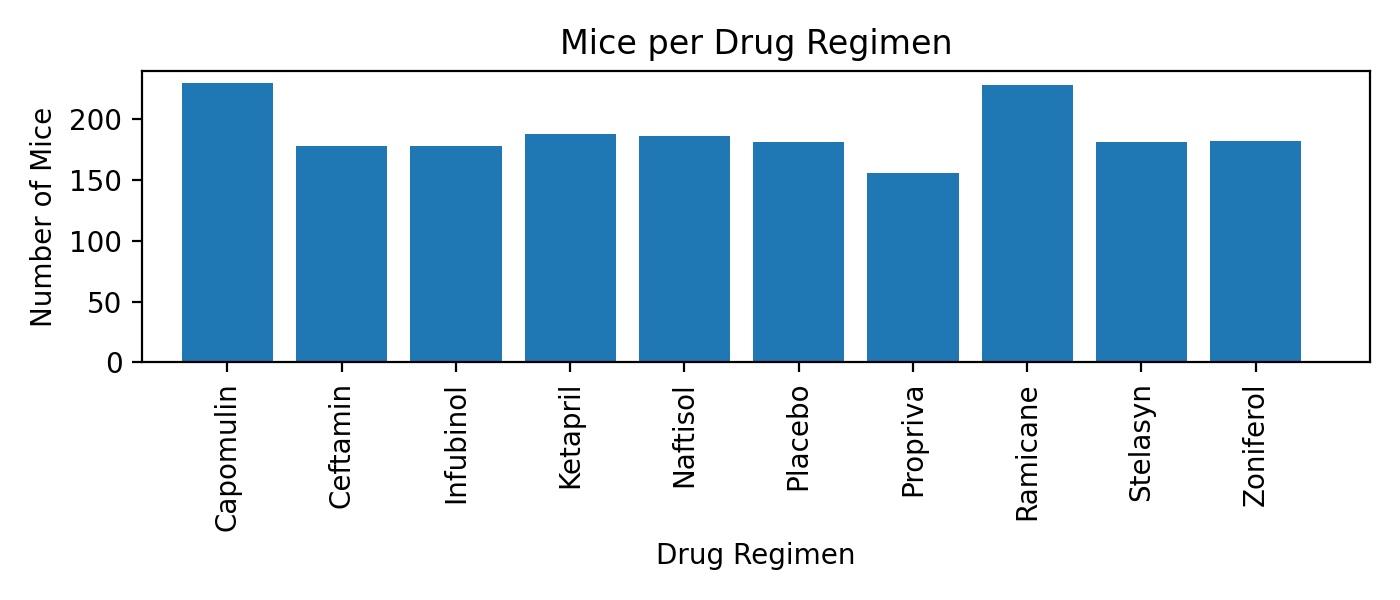

In [177]:
plt.figure(figsize=(7,3))
plt.bar(x_axis,mice_drug_2["Mouse ID"])

plt.xticks(tick_locations, mice_drug2["Drug Regimen"], rotation = "vertical")

plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(mice_drug["Mouse ID"])+ 10)

plt.show()
plt.tight_layout()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot




## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
